#################################
##    뉴스 기사 요약 전처리   ##
#################################

0. 라이브러리 임포트

In [25]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import time
from tqdm import tqdm

1. 데이터 불러오기 및 합치기

In [26]:
raw_train_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/train.csv')
raw_valid_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/valid.csv')

raw_df = pd.concat([raw_train_df, raw_valid_df], ignore_index=True)

print(f'원본 트레인 데이터 길이 : {len(raw_train_df)}')
print(f'원본 검증 데이터 길이 : {len(raw_valid_df)}')
print(f'예상 최종 데이터 길이 : {len(raw_train_df)+len(raw_valid_df)}')
print(f'실제 데이터 길이 : {len(raw_df)}')
print(raw_df.head())
# raw_df = pd.read_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/finalPreprocess.csv')

원본 트레인 데이터 길이 : 243983
원본 검증 데이터 길이 : 30122
예상 최종 데이터 길이 : 274105
실제 데이터 길이 : 274105
                           title  \
0         논 타작물 재배, 2월 말까지 신청하세요   
1  여수시, 컬러빌리지 마무리...‘색채와 빛’도시 완성   
2        “새해 정기 받고 올해는 반드시 일내자!”   
3          농업인 역량 강화, 새해 실용교육 실시   
4          타이완 크루즈관광객 4천여명‘전남’온다   

                                            sentence  \
0  ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...   
1  8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...   
2  전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...   
3  11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...   
4  홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...   

                                                 abs  
0  전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...  
1  여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...  
2  전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...  
3  광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작...  
4  올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...  


2. title 열 날리기

In [27]:
raw_df = raw_df.iloc[:, 1:]
print(raw_df.head())

                                            sentence  \
0  ha당 조사료 400만원…작물별 차등 지원 이성훈 sinawi@hanmail.net...   
1  8억 투입, 고소천사벽화·자산마을에 색채 입혀 이성훈 sinawi@hanmail.n...   
2  전남드래곤즈 해맞이 다짐…선수 영입 활발 이성훈 sinawi@hanmail.net ...   
3  11~24일, 매실·감·참다래 등 지역특화작목 이성훈 sinawi@hanmail.n...   
4  홍콩 크루즈선사‘아쿠아리우스’ 4, 6월 여수항 입항 이성훈 sinawi@hanma...   

                                                 abs  
0  전라남도가 쌀 과잉문제를 근본적으로 해결하기 위해 올해부터 벼를 심었던 논에 벼 대...  
1  여수시는 컬러빌리지 사업에 8억원을 투입하여 ‘색채와 빛’ 도시를 완성하여 고소천사...  
2  전남드래곤즈 임직원과 선수단이 4일 구봉산 정상에 올라 일출을 보며 2018년 구단...  
3  광양시는 농업인들의 경쟁력을 높이고, 소득안정을 위해 매실·감·참다래 등 지역특화작...  
4  올해 4월과 6월 두 차례에 걸쳐 타이완의 크루즈 관광객 4000여명이 여수에 입항...  


3. 정규 표현식

In [28]:
sentence = raw_df['sentence']
abs = raw_df['abs']

print("정규 표현식 적용 전 데이터 프레임")
print(raw_df[20:30])

def regex_column(columnList):
  if not isinstance(columnList, str):                                                   # Nan을 빈 문자열로 대체
      return ''
  columnList = re.sub(r'\S+@\S+\.\S+', '', columnList)                                  # 이메일 삭제
  columnList = columnList.replace('\n', '')                                             # 개행 삭제
  columnList = re.sub(r'\[.*?\]|\{.*?\}|\(.*?\)', '', columnList)                       # 소,중,대괄호 내용 삭제
  columnList = re.sub(r'[^가-힣a-zA-Z0-9\u4e00-\u9fff\s.,!?\'\"~]', ' ', columnList)    # 이상한 특수문자 삭제
  columnList = re.sub(r'\s+', ' ', columnList).strip()                                  # 양 끝 공백 삭제
  return columnList

sentence = sentence.apply(regex_column)
abs = abs.apply(regex_column)

df = pd.DataFrame({
    'sentence':sentence,
    'abs':abs
})

print("\n정규 표현식 적용 후 데이터 프레임")
print(df[20:30])

정규 표현식 적용 전 데이터 프레임
                                             sentence  \
20  광양상의, 기업 경기 현황 조사…기업들, 보수적 경영활동 강화 이성훈 sinawi@...   
21  내 인생 첫 스크린‘광양 제일극장’ 광양뉴스 webmaster@gynet.co.kr...   
22  중마도서관‘나만의 그림책 만들기’10권 제작 이성훈 sinawi@hanmail.ne...   
23  1월 말까지, 읍면동 농업인상담소에 신청 이성훈 sinawi@hanmail.net ...   
24  누락자 발생예방 위한 홍보·접수‘총력’ 이성훈 sinawi@hanmail.net 광...   
25  어린이들의 꿈과 희망을 찾는‘희망도서관’ 김영신 기자 yskim0966@naver....   
26  31일까지…위택스? 이성훈 sinawi@hanmail.net 광양시는 매년 6월과 ...   
27  도로점용허가 필수, 규격? 이성훈 sinawi@hanmail.net 광양시는 올해 ...   
28  ‘아이 양육하기 좋은 도시’탄력 기대 이성훈 sinawi@hanmail.net 광양...   
29  시민과 1:1 카톡방…SNS 소통행정 확대 이성훈 sinawi@hanmail.net...   

                                                  abs  
20  광양상공회의소 1분기 기업경기전망 지수(BSI)를 조사한 결과 올해 경기 전망은 지...  
21  80년대 초반 광양 제일극장은 동시대를 살아온 사람들의 추억이 엮여있는 문화의 공간...  
22  광양시가 지난해 3월부터 중마도서관의 성인 대상 야간 프로그램인 ‘나만의 그림책 만...  
23  광양시는 올해 과수·채소·화훼·특작, 식량작물, 기술지원 등 5개 분야 18개 사업...  
24  광양시는 8일 ‘광양시 일자리 안정자금 지원단’ 협의회를 개최하고 일자리 안정자금 ...  
25  ‘희망도서관’은 책을 

4. 난수 날리기

In [29]:
print(f'난수 날리기 전 데이터프레임 길이 : {len(df)}')
df = df.dropna()
print(f'난수 날리기 후 데이터프레임 길이 : {len(df)}')

난수 날리기 전 데이터프레임 길이 : 274105
난수 날리기 후 데이터프레임 길이 : 274105


5. 문자열 길이 제한 하기

5-1. 문자열 길이 시각화


Sentence 열 길이:
최대 길이: 6741, 최소 길이: 3, 평균 길이: 660.49

Abs 열 길이:
최대 길이: 682, 최소 길이: 0, 평균 길이: 127.50


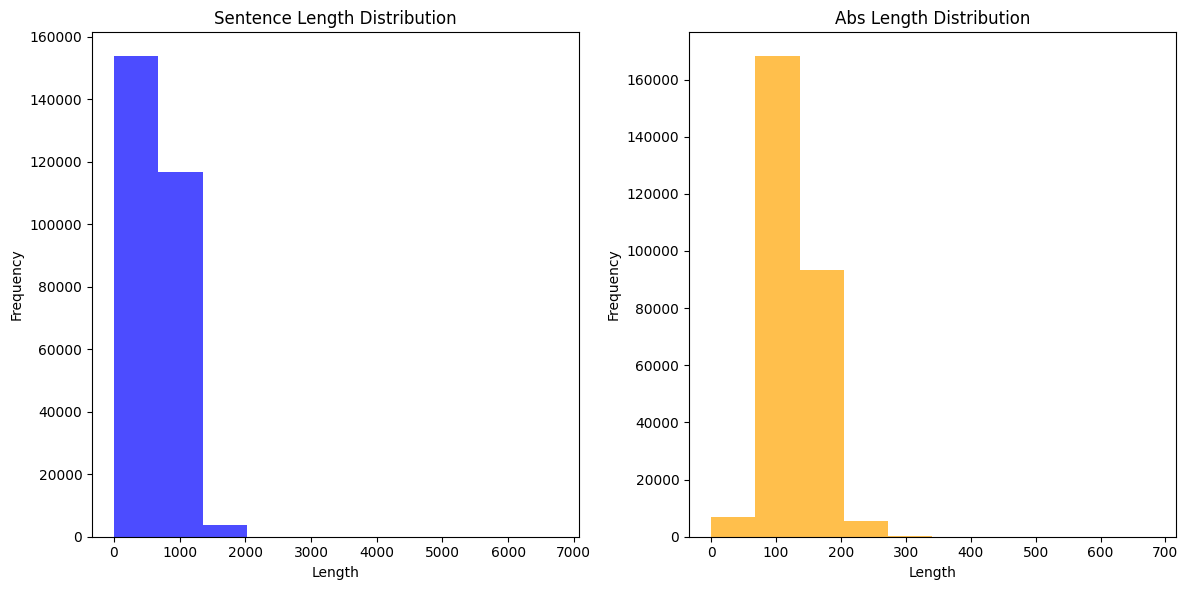

In [30]:
def data_length_distribution(df, sentence='sentence', abs='abs'):
  df['sentence_length'] = df[sentence].apply(len)
  df['abs_length'] = df[abs].apply(len)

  sentence_max_length = df['sentence_length'].max()
  sentence_min_length = df['sentence_length'].min()
  sentence_mean_length = df['sentence_length'].mean()

  abs_max_length = df['abs_length'].max()
  abs_min_length = df['abs_length'].min()
  abs_mean_length = df['abs_length'].mean()

  print("\nSentence 열 길이:")
  print(f"최대 길이: {sentence_max_length}, 최소 길이: {sentence_min_length}, 평균 길이: {sentence_mean_length:.2f}")

  print("\nAbs 열 길이:")
  print(f"최대 길이: {abs_max_length}, 최소 길이: {abs_min_length}, 평균 길이: {abs_mean_length:.2f}")

  plt.figure(figsize=(12, 6))

  plt.subplot(1, 2, 1)
  plt.hist(df['sentence_length'], bins=10, color='blue', alpha=0.7)
  plt.title('Sentence Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.subplot(1, 2, 2)
  plt.hist(df['abs_length'], bins=10, color='orange', alpha=0.7)
  plt.title('Abs Length Distribution')
  plt.xlabel('Length')
  plt.ylabel('Frequency')

  plt.tight_layout()
  plt.show()
  df = df.drop(columns=['sentence_length','abs_length'])
  
data_length_distribution(df)


5-2. 길이 제한


Sentence 열 길이:
최대 길이: 799, 최소 길이: 11, 평균 길이: 535.81

Abs 열 길이:
최대 길이: 149, 최소 길이: 12, 평균 길이: 111.60


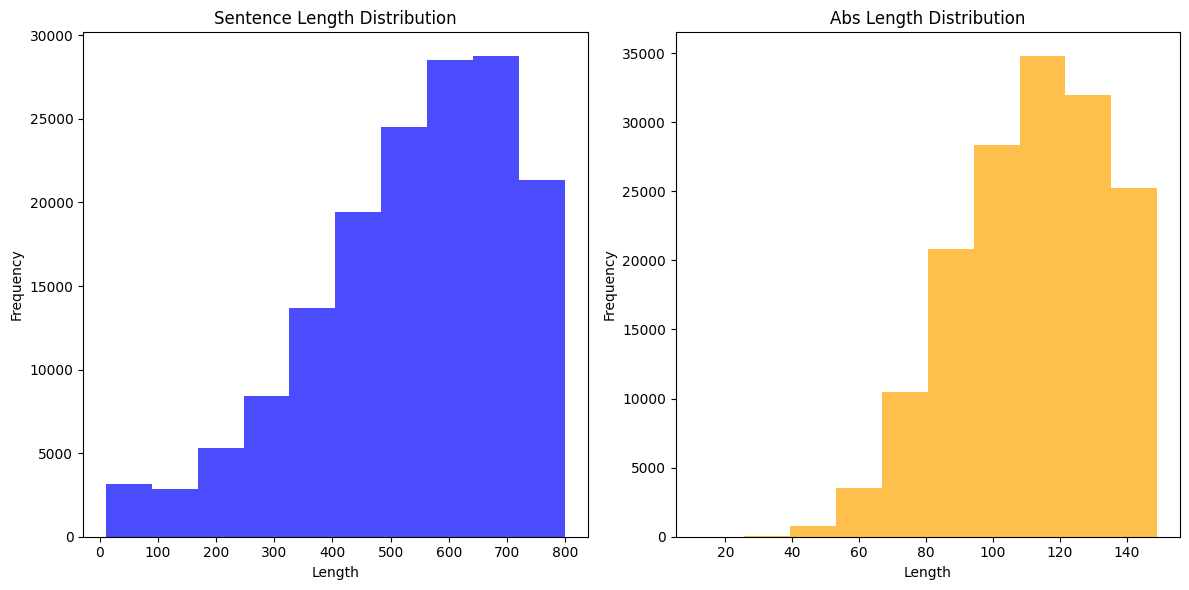

길이 제한 전 데이터 프레임 길이 : 274105
길이 제한 후 데이터 프레임 길이 : 155997
삭제 된 행 : 118108


In [31]:
pre_length = len(df)

df = df[(df['sentence'].str.len() > 10) & (df['sentence'].str.len() < 800)]
df = df[(df['abs'].str.len() > 10) & (df['abs'].str.len() < 150)] # & (df['abs'].str.len() < 150)

data_length_distribution(df)

after_length = len(df)

print(f'길이 제한 전 데이터 프레임 길이 : {pre_length}')
print(f'길이 제한 후 데이터 프레임 길이 : {after_length}')
print(f'삭제 된 행 : {pre_length-after_length}')

df.to_csv('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/finalPreprocess.csv')

6. 토큰화

6-1. SubwordTokenizer 실행

In [36]:
sentences = []
for sentence in df['sentence']:
    sentences.append(sentence)
abs = []
for sentence in df['abs']:
    abs.append(sentence)

start_time = time.time()

tokenizer = tfds.deprecated.text.SubwordTextEncoder.build_from_corpus(
    sentences + abs, target_vocab_size = 2**12
)

end_time = time.time()
total_time = end_time - start_time

# 초를 시, 분, 초로 변환
hours = int(total_time // 3600)
minutes = int((total_time % 3600) // 60)
seconds = total_time % 60

print(f"토크나이저 총 소요 시간: {hours}시간 {minutes}분 {seconds:.2f}초")
tokenizer.save_to_file('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/tokenizer')

토크나이저 총 소요 시간: 0시간 19분 46.50초


6-2. 토큰화 검증

In [37]:
tokenizer = tfds.deprecated.text.SubwordTextEncoder.load_from_file('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/문서요약 텍스트/Preprocess/tokenizer')

print(f'토큰 크기: {tokenizer.vocab_size}')
print(f'\n토큰 예시: {tokenizer.subwords[:10]}')
print(f'\n인코딩 테스트 - 전: {sentences[19]}')
encodingList = tokenizer.encode(sentences[19])
print(f'\n인코딩 테스트 - 후: {encodingList}')

토큰 크기: 4079

토큰 예시: ['. ', '을_', ', ', '의_', '에_', '이_', '를_', '는_', '은_', '한_']

인코딩 테스트 - 전: 누락자 발생예방 위한 홍보 접수 총력 이성훈 광양시는 지난 8일 신현숙 부시장 주재로 일자리 안정자금 지원사업의 성공적인 정착 지원을 위한 광양시 일자리 안정자금 지원단 협의회를 개최했다. 회의에는 실과소장과 읍면동장, 전담직원 등 35명이 참석한 가운데 지난 1일부터 시행하고 있는 일자리 안정자금 대상자인 30인 미만 중소기업과 소상공인들이 누락되지 않도록 홍보와 접수 지원에 대한 대책 협의를 위해 마련됐다. 일자리 안정자금 이란 2018년도 최저임금 인상에 따라 경영상의 어려움에 처할 수 있는 소상공인과 영세 중소기업의 경영부담을 완화하고, 노동자의 고용불안을 해소하기 위해 사업주에게 인건비를 지원하는 제도다. 지원대상은 월 보수액 190만원 미만의 노동자를 1개월 이상 고용한 30인 미만 고용사업주로, 최저임금 준수와 고용보험에 가입되어 있어야 한다. 일자리 안정자금 지원을 받고자 하는 사업주는 가까운 읍면동 주민센터를 방문해 신청서를 작성 제출하면 되며, 근로복지공단에서 심사를 통해 지급하게 된다. 신현숙 부시장은 일자리 안정자금을 지원받을 수 있는 대상 사업주들이 빠짐없이 신청할 수 있도록 적극적으로 안내에 힘쓰라 며 읍면동 전담직원들도 일자리 안정자금 접수가 원활히 추진될 수 있도록 이번 사업의 취지를 충분히 숙지하길 바란다 고 당부했다. 자세한 사항은 근로복지공단, 고용센터으로 연락 하거나, 일자리 안정자금 홈페이지를 참고하면 된다.

인코딩 테스트 - 후: [819, 756, 143, 1067, 3511, 123, 3560, 1025, 3855, 451, 1043, 19, 60, 1536, 2575, 425, 77, 1419, 51, 191, 683, 3855, 44, 519, 56, 74, 15, 1196, 1501, 1423, 3855, 1918, 4, 2983, 35, 34

7. 구분 토큰 추가 및 패딩

In [38]:
start_time = time.time()
beforeSentence = sentences[99]
beforeAbs = abs[99]

START_TOKEN, END_TOKEN = [tokenizer.vocab_size], [tokenizer.vocab_size+1]
VOCAB_SIZE = tokenizer.vocab_size + 2

SEN_MAX_LENGTH = 799
ABS_MAX_LENGTH = 149

def tokenized_and_padding(sentences, abses):
  tokenized_sentence, tokenized_abs = [], []
  
  for (sentence, abs) in zip(sentences, abses):
    sentence = START_TOKEN + tokenizer.encode(sentence) + END_TOKEN
    abs = START_TOKEN + tokenizer.encode(abs) + END_TOKEN
    
    tokenized_sentence.append(sentence)
    tokenized_abs.append(abs)
    
  tokenized_sentence = tf.keras.preprocessing.sequence.pad_sequences(
        tokenized_sentence, maxlen=SEN_MAX_LENGTH, padding='post'
    )
  tokenized_abs = tf.keras.preprocessing.sequence.pad_sequences(
      tokenized_abs, maxlen=ABS_MAX_LENGTH, padding='post'
  )
  
  return tokenized_sentence, tokenized_abs

sentences, abs = tokenized_and_padding(sentences, abs)

print(f'sentence 원본 : {beforeSentence}')
print(f'\nsentence 토큰화 및 패딩 결과 : {sentences[99]}')
print(f'\nabs 원본 : {beforeAbs}')
print(f'\nabs 토큰화 및 패딩 결과 : {abs[99]}')

end_time = time.time()
total_time = end_time - start_time
minutes, seconds = divmod(total_time, 60)

print(f"\n총 소요 시간: {int(minutes)}분 {seconds:.2f}초")

sentence 원본 : 정기총회 개최 올해 주요사업 확정 광양뉴스 광양시향토청년회은 지난 7일 중동 광양시새마을금고 본점 3층 갤러리에서 2018년 정기총회를 개최하고 2018년 광양발전과 광양시민을 위한 사업을 확정했다. 회원 60여명이 참석한 이날 정기총회는 지난 2월 2일 있었던 창립식 및 초대 회장단 감사 취임식에 들어온 쌀을 금호동 소재 햇빛마을주간보호센터와 광양중학교 축구부, 광양여자고등학교 축구부에 나누는 전달식이 열려 마음을 따뜻하게 했다. 올해 주요 사업으로는 가족과 함께하는 사랑의 향토농장 영국 프리미어리그 사회공헌 프로그램 프리미어 스킬스 교육 향토농장 수확물로 지역민과 함께하는 바베큐 파티 작은 음악회 전남드래곤즈 홍보 캠페인 등을 펼칠 계획이다. 김대성 회장은 광양발전과 광양시민을 위해 공감향토 이념으로 똘똘 뭉쳐 변화할 광양의 미래를 위해 역량을 갖추고 끊임없는 도전정신과 역동적인 패기로 최선을 다하는 100년 단체 광양시향토청년회 초석을 다지는 2018년이 되자 고 말했다. 한편, 광양시향토청년회는 3월 8일 정기총회 후 첫 사업으로 문화체육단 주관으로 금호동 소재 햇빛마을주간보호센터에서 센터 축구동아리 회원들에게 프리미어 스킬스를 전파했다. 김대욱 단장을 비롯한 4명의 프로축구선수 출신 회원이 8주차 교육을 준비하고 있으며 수료자에게는 프리미어 스킬스 수료증이 지급될 예정이다. 김대성 시민기자

sentence 토큰화 및 패딩 결과 : [4079 1380 3092 3855  518 3855  221   56  241  271 1466 3855 2575 2889
 3855 2575   34  375  217  670  281    9   77 1410   93  316 2575   34
  452  713  174   12  344  446 3874  864 2137  239   41   18 1540 1380
 3092    7 1874   12 1540 2575  404   13 2575  478    2  123  473 14

8. 결과 저장

In [39]:
import pickle

with open('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/pickle/sentences.pkl', 'wb') as f:
    pickle.dump(sentences, f)

with open('D:/TJ_FInal_Project/KDJ/News_Summarization/Data/pickle/abs.pkl', 'wb') as f:
    pickle.dump(abs, f)

print('피클 저장 완료!')

피클 저장 완료!
